In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from qucat import Network,GUI,L,J,C,R

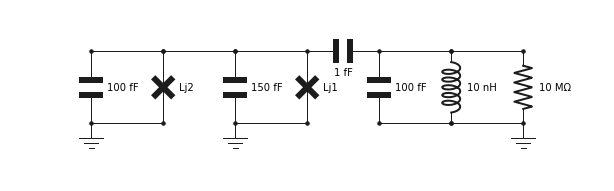

In [3]:
case6 = GUI('circuits/case6.txt', 
        edit=True, 
        plot=True, 
        print_network=False) 

In [4]:
# Compute hamiltonian 
H = case6.hamiltonian(
    modes = [0,1],# modes 
    taylor = 2,# Taylor expansion to the power 2
    excitations = [8,10],
    Lj1 = 6e-9,Lj2=8e-9)

# QuTiP method which return the eigenergies of the system
ee = H.eigenenergies()

In [5]:
first_transition = ee[1]-ee[0]
print("%.3f GHz"%((first_transition)/1e9))

5.007 GHz


In [6]:
# H is the Hamiltonian
H,a_m_list = case6.hamiltonian(modes = [0,1],taylor = 2,excitations = [5,5], Lj1 = 6e-9, Lj2=8e-9,
    return_ops = True) 

# The Hamiltonian should be in angular frequencies for time-dependant simulations
H = 2.*np.pi*H
k = case6.loss_rates(Lj1 = 6e-9,Lj2=8e-9) # loss rates of the different modes
c_ops = [np.sqrt(2*np.pi*k[0])*a_m_list[0],np.sqrt(2*np.pi*k[1])*a_m_list[1]]

In [7]:
case6.eigenfrequencies(Lj1=6e-9,Lj2=8e-9)

array([5.00737591e+09, 5.42605866e+09])

In [8]:
case6.anharmonicities(Lj1=6e-9,Lj2=8e-9)

array([1.53578346e+02, 7.69569879e+07])

In [9]:
K = case6.kerr(Lj1=6e-9,Lj2=8e-9)
print("%.2f kHz"%(K[0,1]/1e3))

217.43 kHz


In [10]:
A = case6.anharmonicities(Lj1=6e-9,Lj2=8e-9)
print("%.2f kHz"%(2*np.sqrt(A[0]*A[1])/1e3))

217.43 kHz


In [11]:
case6.loss_rates(Lj1=6e-9,Lj2=8e-9)

array([157302.61955811,    282.74815812])

In [12]:
T_1 = 1/case6.loss_rates(Lj1=6e-9,Lj2=8e-9)/2/np.pi
print(T_1)

[1.01177554e-06 5.62885870e-04]


In [13]:
case6.f_k_A_chi(Lj1=6e-9,Lj2=8e-9)

(array([5.00737591e+09, 5.42605866e+09]),
 array([157302.61955811,    282.74815812]),
 array([1.53578346e+02, 7.69569879e+07]),
 array([[1.53578346e+02, 2.17429776e+05],
        [2.17429776e+05, 7.69569879e+07]]))

In [15]:
f,k,A,chi = case6.f_k_A_chi(pretty_print=True,Lj1=6e-9,Lj2=8e-9)

         mode |       freq.  |       diss.  |       anha.  |
            0 |     5.01 GHz |      157 kHz |       154 Hz |
            1 |     5.43 GHz |       283 Hz |       77 MHz |

Kerr coefficients (diagonal = Kerr, off-diagonal = cross-Kerr)
         mode |         0    |         1    |
            0 |       154 Hz |              |
            1 |      217 kHz |       77 MHz |



C:\Users\nithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\nithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


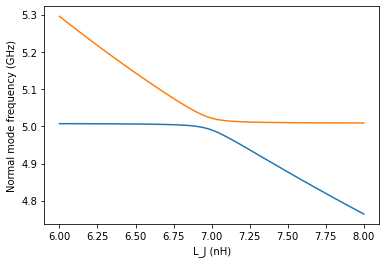

In [31]:
# array of values for the josephson inductance
Lj1_list = np.linspace(6e-9,8e-9,101)
Lj2_list = np.linspace(9e-9,10e-9,101)

# Eigen-frequencies of the system:
freqs = case6.eigenfrequencies(Lj1=Lj1_list,Lj2=Lj2_list)

plt.plot(Lj1_list*1e9,freqs[0]/1e9)
plt.plot(Lj1_list*1e9,freqs[1]/1e9)

# Add labels
plt.xlabel('L_J (nH)')
plt.ylabel('Normal mode frequency (GHz)')

# show the figure
plt.show()

C:\Users\nithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\nithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


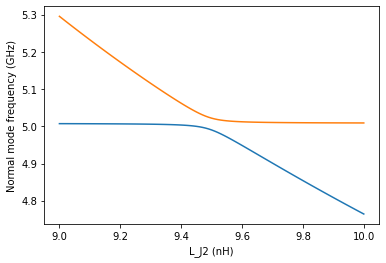

In [32]:
# array of values for the josephson inductance
Lj2_list = np.linspace(9e-9,10e-9,101)

# Eigen-frequencies of the system:
freqs = case6.eigenfrequencies(Lj1=Lj1_list,Lj2=Lj2_list)

plt.plot(Lj2_list*1e9,freqs[0]/1e9)
plt.plot(Lj2_list*1e9,freqs[1]/1e9)

# Add labels
plt.xlabel('L_J2 (nH)')
plt.ylabel('Normal mode frequency (GHz)')

# show the figure
plt.show()

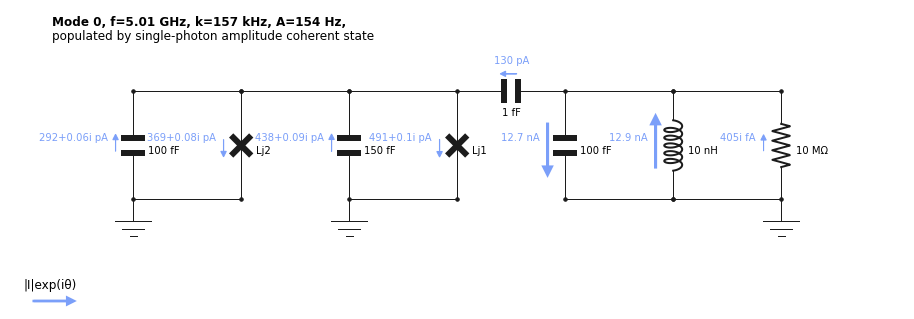

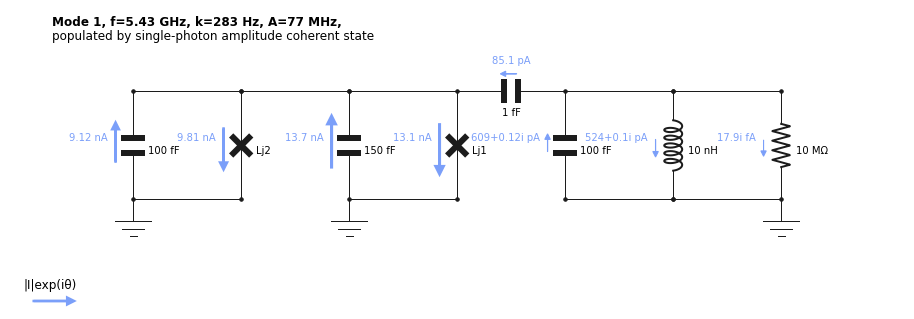

In [33]:
case6.show_normal_mode(mode=0,quantity='current', Lj1 = 6e-9, Lj2=8e-9)
case6.show_normal_mode(mode=1,quantity='current', Lj1 = 6e-9, Lj2=8e-9)

In [34]:
Lj1=freqs[0]/1e9
print(Lj1)

[5.00710782+0.j 5.00708815+0.j 5.00706765+0.j 5.00704628+0.j
 5.00702398+0.j 5.00700069+0.j 5.00697633+0.j 5.00695084+0.j
 5.00692413+0.j 5.00689611+0.j 5.0068667 +0.j 5.00683576+0.j
 5.0068032 +0.j 5.00676888+0.j 5.00673265+0.j 5.00669435+0.j
 5.0066538 +0.j 5.00661079+0.j 5.0065651 +0.j 5.00651647+0.j
 5.00646462+0.j 5.0064092 +0.j 5.00634985+0.j 5.00628613+0.j
 5.00621756+0.j 5.00614356+0.j 5.00606348+0.j 5.00597654+0.j
 5.00588185+0.j 5.00577834+0.j 5.00566474+0.j 5.00553955+0.j
 5.00540095+0.j 5.00524673+0.j 5.0050742 +0.j 5.00488004+0.j
 5.00466009+0.j 5.00440914+0.j 5.0041206 +0.j 5.00378597+0.j
 5.0033943 +0.j 5.00293127+0.j 5.00237811+0.j 5.00171013+0.j
 5.0008951 +0.j 4.99989168+0.j 4.99864888+0.j 4.99710825+0.j
 4.99521079+0.j 4.9929095 +0.j 4.99018349+0.j 4.98704592+0.j
 4.98353978+0.j 4.97972469+0.j 4.97566298+0.j 4.97141064+0.j
 4.96701378+0.j 4.96250864+0.j 4.95792295+0.j 4.95327778+0.j
 4.9485891 +0.j 4.94386906+0.j 4.93912698+0.j 4.93437008+0.j
 4.92960399+0.j 4.924833

In [35]:
x = np.linspace((-np.pi/2),(np.pi/2),80)
print(x.size)

80


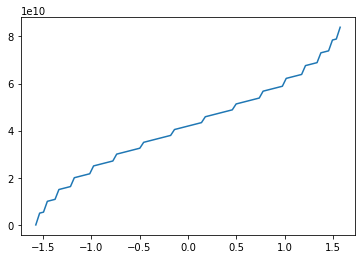

In [36]:
plt.plot(x,ee)

In [37]:
ee

array([0.00000000e+00, 5.00737591e+09, 5.42605866e+09, 1.00147518e+10,
       1.04334346e+10, 1.08521173e+10, 1.50221277e+10, 1.54408105e+10,
       1.58594932e+10, 1.62781760e+10, 2.00295036e+10, 2.04481864e+10,
       2.08668691e+10, 2.12855519e+10, 2.17042347e+10, 2.50368795e+10,
       2.54555623e+10, 2.58742451e+10, 2.62929278e+10, 2.67116106e+10,
       2.71302933e+10, 3.00442555e+10, 3.04629382e+10, 3.08816210e+10,
       3.13003037e+10, 3.17189865e+10, 3.21376692e+10, 3.25563520e+10,
       3.50516314e+10, 3.54703141e+10, 3.58889969e+10, 3.63076796e+10,
       3.67263624e+10, 3.71450451e+10, 3.75637279e+10, 3.79824107e+10,
       4.04776900e+10, 4.08963728e+10, 4.13150555e+10, 4.17337383e+10,
       4.21524211e+10, 4.25711038e+10, 4.29897866e+10, 4.34084693e+10,
       4.59037487e+10, 4.63224315e+10, 4.67411142e+10, 4.71597970e+10,
       4.75784797e+10, 4.79971625e+10, 4.84158452e+10, 4.88345280e+10,
       5.13298074e+10, 5.17484901e+10, 5.21671729e+10, 5.25858556e+10,
      